## End-To-End Multiclass Classification Problem
### The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

## 1 . Importing Dataset 

### Dataset Information
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1.sepal length in cm

2.sepal width in cm

3.petal length in cm

4.petal width in cm

5.Species: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

### 1.1 Importing Necessary Libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### 1.2 First 5 rows of the Data

In [3]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. EDA and Data Visualization

In [138]:
### Therefore we have 150 sample rows and 6 features
iris_df.shape

(150, 6)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
### Checking for null values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
### Statistical Summary of our data
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.
#### Hence, rescaling/normalization is not required in this case

In [11]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
iris_df['Species'].value_counts()


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

#### We can see that each class has the same number of instances (50 or 33% of the dataset). Thus our data is balanced.

In [66]:
iris_df.groupby('Species').agg(["min","max","std","mean"])

Id                       SepalLengthCm                 \
                 min  max       std   mean           min  max       std   
Species                                                                   
Iris-setosa        1   50  14.57738   25.5           4.3  5.8  0.352490   
Iris-versicolor   51  100  14.57738   75.5           4.9  7.0  0.516171   
Iris-virginica   101  150  14.57738  125.5           4.9  7.9  0.635880   

                       SepalWidthCm                       PetalLengthCm       \
                  mean          min  max       std   mean           min  max   
Species                                                                        
Iris-setosa      5.006          2.3  4.4  0.381024  3.418           1.0  1.9   
Iris-versicolor  5.936          2.0  3.4  0.313798  2.770           3.0  5.1   
Iris-virginica   6.588          2.2  3.8  0.322497  2.974           4.5  6.9   

                                 PetalWidthCm                        
                      std   mean          min  max       std   mean  
Species                                                              
Iris-setosa      0.173511  1.464          0.1  0.6  0.107210  0.244  
Iris-versicolor  0.469911  4.260          1.0  1.8  0.197753  1.326  
Iris-virginica   0.551895  5.552          1.4  2.5  0.274650  2.026

In [28]:
fig = px.bar(x = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], y = iris_df['Species'].value_counts() , width = 800,height =400,title = 'Value Counts for Different Species',labels=['Species','Count'])
fig.show()

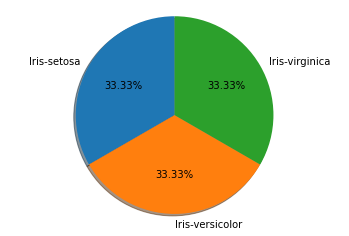

In [34]:
### Pie Chart for Class attribute

labels = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

fig, ax = plt.subplots()
ax.pie(iris_df['Species'].value_counts(),labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax.axis('equal')  

plt.show()

In [37]:
df = iris_df.drop('Id',axis=1)

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

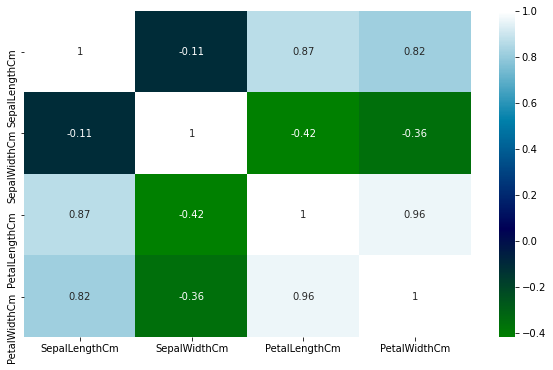

In [43]:
### Correlation Matrix

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="ocean")

#### Inference : SepalLength and SepalWidth have a very small correlation between them .
####                    PetalLenght and SepalWidth have a very strong correlation

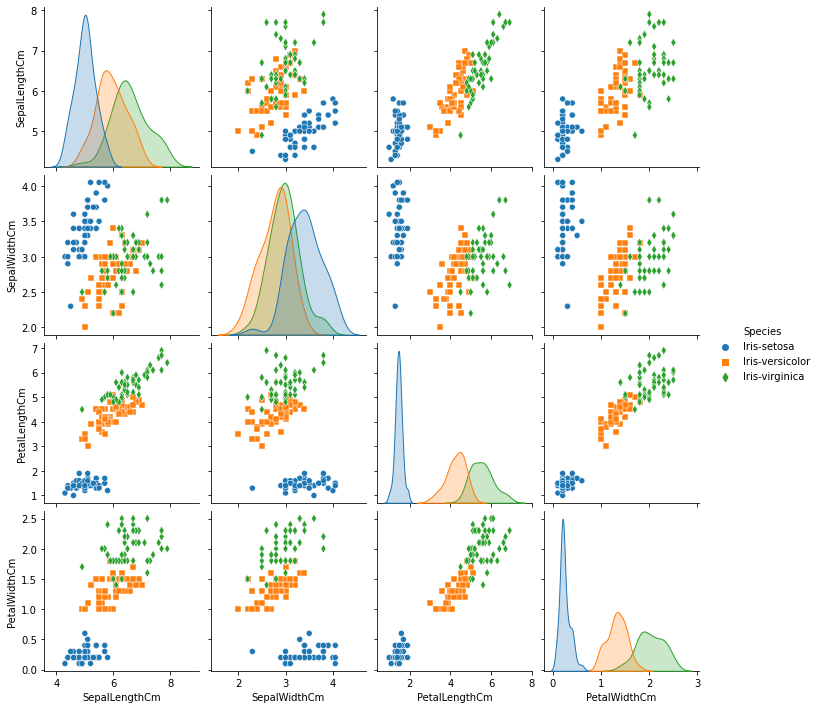

In [70]:
sns.pairplot(data=df,hue="Species",markers=["o","s","d"])

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

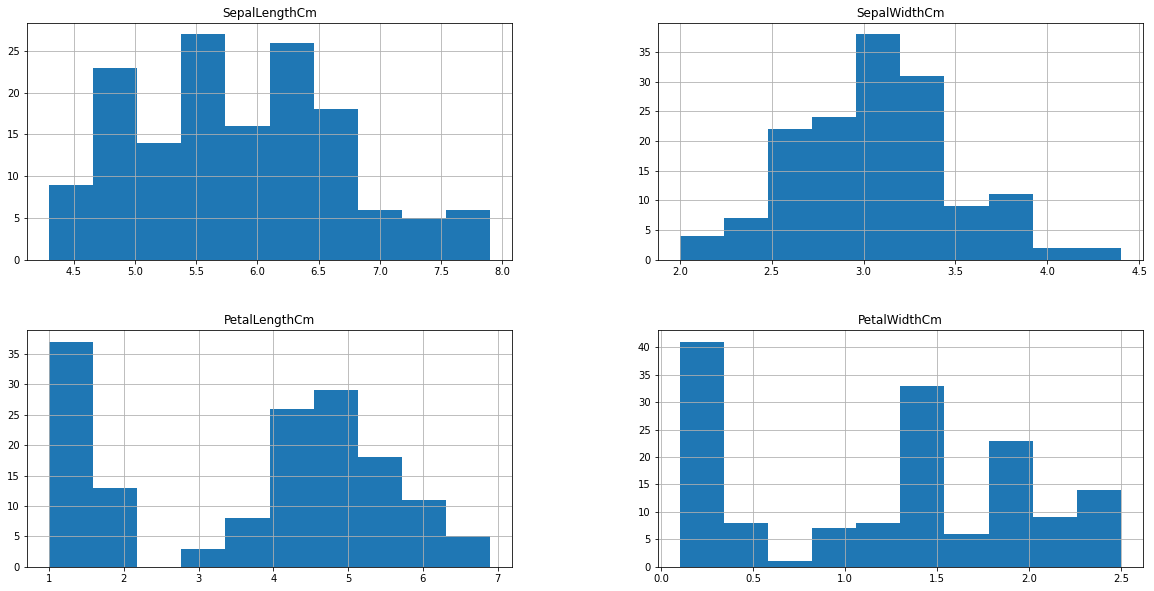

In [47]:
df.hist(figsize=(20,10))

#### We can say that SepalWidth and SepalLength has gaussian distributed data however the other two have rather skewed data.

#### 2.1 Outlier Detection and Removal

<AxesSubplot:>

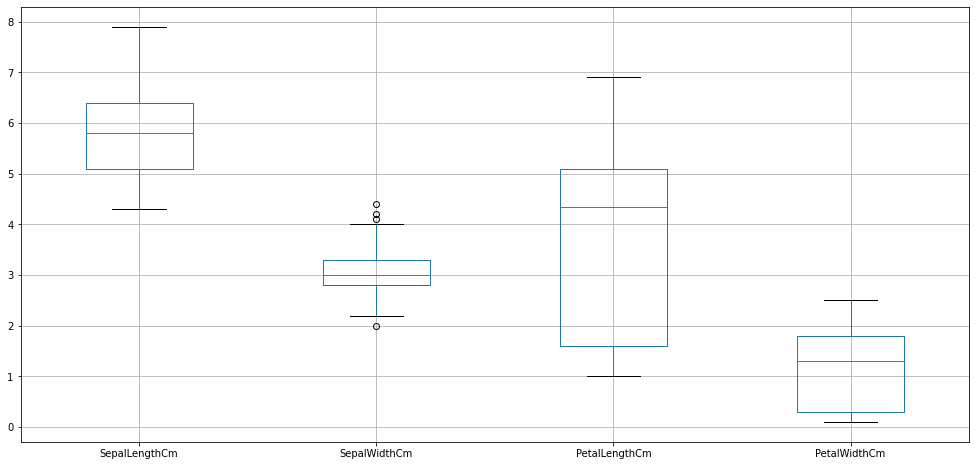

In [51]:
df.boxplot(figsize=(17,8))

In [73]:
df.columns[:-1]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [78]:
### We can see that SepalWidth feature has some outliers clearly in the boxplot. Using IQR method for outlier removal.

for column in df.columns[:-1]:
    for spec in df["Species"].unique():
        spec_type = df[df["Species"] == spec]
        Selected_column = spec_type[column]
        q1 = Selected_column.quantile(0.25) 
        q3 = Selected_column.quantile(0.75) 
        iqr = q3 - q1 # interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outliers = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index 
        print(outliers)
        df.drop(index = outliers, inplace=True)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([106], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([13, 22, 24, 44], dtype='int64')
Int64Index([98], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([23, 43], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [79]:
### Number of samples and features after outlier removal
df.shape

(142, 5)

#### 2.2 Label Encoding for our Target Feature

In [82]:
label= LabelEncoder()
df["Species"] = label.fit_transform(df["Species"]) # transforming Species column into label encoding format

In [83]:
df["Species"].unique()

array([0, 1, 2])

In [85]:
X = df.drop('Species',axis=1)   ### independent features
y = df['Species']               ### dependent features

### 3. Applying Machine Learning Algorithms

#### 3.1 Train Test Split ( 80% Training Data 20% Testing Data)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [90]:
X_train.shape

(113, 4)

In [91]:
X_test.shape

(29, 4)

In [92]:
y_train.shape

(113,)

In [93]:
y_test.shape

(29,)

### 3.1 Decision Tree

In [139]:
### Tree Without Pruning

tree = DecisionTreeClassifier(criterion='gini' ,random_state = 1)
tree.fit(X_train , y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [140]:
### Using GridSearhCV for Pruning and To Avoid Overfitting

param_dist = {
    "criterion" : ["gini" , "entropy"] , 
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,None] , 
    "min_samples_split" : [10,20,50,80,100,200,300,500]
}
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
grid_dt = GridSearchCV(tree , param_grid = param_dist , cv=kfold , n_jobs=-1)
grid_dt.fit(X_train,y_train)

print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}


In [141]:
tree2 = DecisionTreeClassifier(criterion='gini', max_depth= 3 , min_samples_split=10)
tree2.fit(X_train , y_train)
y_pred_dt = tree2.predict(X_test)

print(confusion_matrix(y_test,y_pred_dt))

print(classification_report(y_test,y_pred_dt,digits=3))

print('The accuracy of the Decision Tree classifier on training data is {:.2f} out of 1'.format(tree2.score(X_train, y_train)))

print('The accuracy of the Decision Tree classifier on test data is {:.2f} out of 1'.format(tree2.score(X_test, y_test)))

[[10  0  0]
 [ 0 12  0]
 [ 0  2  5]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      0.857     1.000     0.923        12
           2      1.000     0.714     0.833         7

    accuracy                          0.931        29
   macro avg      0.952     0.905     0.919        29
weighted avg      0.941     0.931     0.928        29

The accuracy of the Decision Tree classifier on training data is 0.98 out of 1
The accuracy of the Decision Tree classifier on test data is 0.93 out of 1


[Text(627.75, 951.3000000000001, 'X[2] <= 2.5\ngini = 0.664\nsamples = 113\nvalue = [34, 37, 42]'),
 Text(418.5, 679.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(837.0, 679.5, 'X[3] <= 1.75\ngini = 0.498\nsamples = 79\nvalue = [0, 37, 42]'),
 Text(418.5, 407.70000000000005, 'X[2] <= 5.35\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(209.25, 135.89999999999998, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(627.75, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(1255.5, 407.70000000000005, 'X[2] <= 4.85\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(1046.25, 135.89999999999998, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(1464.75, 135.89999999999998, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

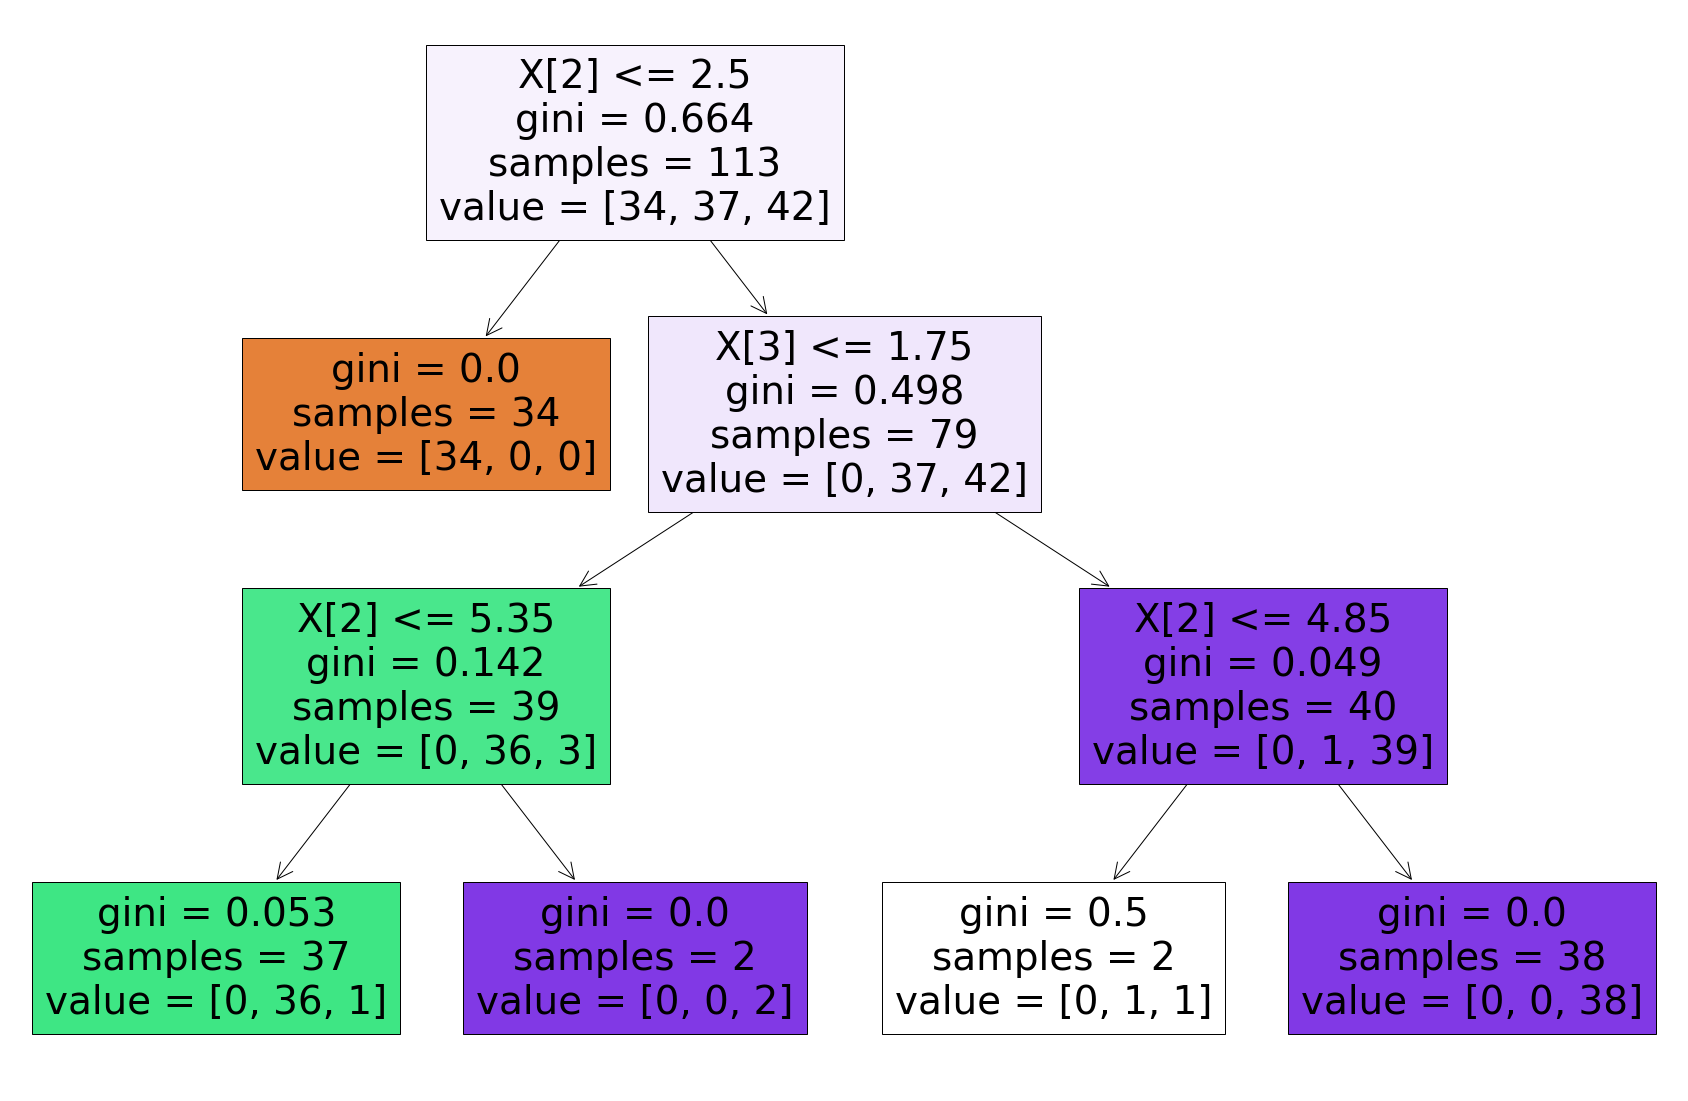

In [142]:
### Pruned Tree
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,20
plot_tree(tree2,filled=True)

### 3.2 KNN

In [143]:
# trying with  K=1 through K=30 and recording testing accuracy to find the optimal value of K
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

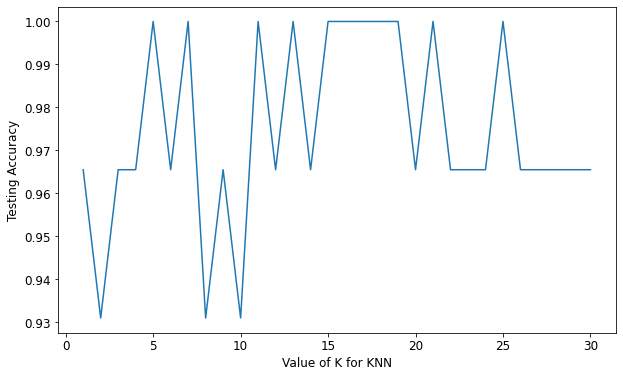

In [155]:
rcParams['figure.figsize'] = 10,6
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### We can see that the value of testing accuracy remains constant between K=12 and K=18. So we can take any value between that range.

In [148]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred_knn))

print(classification_report(y_test,y_pred_knn,digits=3))

print('The accuracy of the KNN on training data is {:.2f} out of 1'.format(knn.score(X_train, y_train)))

print('The accuracy of the KNN on test data is {:.2f} out of 1'.format(knn.score(X_test, y_test)))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000        12
           2      1.000     1.000     1.000         7

    accuracy                          1.000        29
   macro avg      1.000     1.000     1.000        29
weighted avg      1.000     1.000     1.000        29

The accuracy of the KNN on training data is 0.97 out of 1
The accuracy of the KNN on test data is 1.00 out of 1


### 3.3 SVM

In [156]:
### Hyperparamter Tuning to find the best results

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [150]:
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [153]:
svm2 = svm_model.best_estimator_
y_pred_svm = svm2.predict(X_test)

print(confusion_matrix(y_test,y_pred_svm))
print("\n")
print(classification_report(y_test,y_pred,digits=3))

print("Training score for SVM {:.2f} out of 1" .format(svm2.score(X_train , y_train)))
print("Testing score for SVM {:.2f} out of 1".format(svm2.score(X_test  , y_test )))


[[10  0  0]
 [ 0 12  0]
 [ 0  1  6]]


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      0.923     1.000     0.960        12
           2      1.000     0.857     0.923         7

    accuracy                          0.966        29
   macro avg      0.974     0.952     0.961        29
weighted avg      0.968     0.966     0.965        29

Training score for SVM 0.98 out of 1
Testing score for SVM 0.97 out of 1


### 4. Observation and Results

#### We tried three different algorithms for our multiclass problem which yielded us the following accuracies :
#### 1. Decision Tree Classifier : 93%
#### 2. K Nearest Neighbours : 100%
#### 3. Support Vector Machines : 97%

#### Therefore we can say that KNN performed the best out of the three algorithms.